# **Task 1: In the code provided in the use case there are three mistake which stops the code from running successfully find those mistakes.**

# **Import reauired libraries**

In [1]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
from sklearn import preprocessing
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, Flatten

In [2]:
df = pd.read_csv("/content/imdb_master.csv", encoding="latin-1")
print(df.head())

# Remove the unsup classifier data from the dataset
data = df.loc[(df['label'] != 'unsup')]
print(data.shape)

sentences = data['review'].values
y = data['label'].values
print(np.unique(y))

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]
(50000, 5)
['neg' 'pos']


# **tokenizing data**

In [3]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

# **getting the vocabulary of data**

In [4]:
sentences = tokenizer.texts_to_matrix(sentences)

In [5]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)



I have made 3 corrections here-

*   I changed the input_dim to 2000 as after using the tokenizer function with number of words to 2000. the dimesion of the dataset has changed to 2000. 
*   I changed the number of neurons for the last layer from 5 to 2 as we have two classes for the output i.e., 'pos' and 'neg'
*   I changed the activation function for the last layer to 'softMax' because this function is more suitable for classification problems.








In [6]:
model = Sequential()
model.add(layers.Dense(300, input_dim=2000, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X_train,y_train, epochs=10, verbose=True, validation_data = (X_test,y_test), batch_size=256)

Epoch 1/10
147/147 [==============================] - 4s 21ms/step - loss: 0.3395 - accuracy: 0.8544 - val_loss: 0.2963 - val_accuracy: 0.8778
Epoch 2/10
147/147 [==============================] - 3s 20ms/step - loss: 0.2570 - accuracy: 0.8949 - val_loss: 0.3035 - val_accuracy: 0.8699
Epoch 3/10
147/147 [==============================] - 3s 20ms/step - loss: 0.2070 - accuracy: 0.9180 - val_loss: 0.2902 - val_accuracy: 0.8807
Epoch 4/10
147/147 [==============================] - 3s 20ms/step - loss: 0.1388 - accuracy: 0.9532 - val_loss: 0.3046 - val_accuracy: 0.8776
Epoch 5/10
147/147 [==============================] - 3s 20ms/step - loss: 0.0744 - accuracy: 0.9830 - val_loss: 0.3307 - val_accuracy: 0.8734
Epoch 6/10
147/147 [==============================] - 3s 20ms/step - loss: 0.0350 - accuracy: 0.9957 - val_loss: 0.3578 - val_accuracy: 0.8768
Epoch 7/10
147/147 [==============================] - 3s 20ms/step - loss: 0.0169 - accuracy: 0.9991 - val_loss: 0.3871 - val_accuracy: 0.8777

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               600300    
                                                                 
 dense_1 (Dense)             (None, 2)                 602       
                                                                 
Total params: 600,902
Trainable params: 600,902
Non-trainable params: 0
_________________________________________________________________


# **Model accuracy**

In [9]:
[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Model Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

391/391 [==============================] - 1s 3ms/step - loss: 0.4499 - accuracy: 0.8794
Model Evaluation result on Test Data : Loss = 0.44992321729660034, accuracy = 0.879360020160675


# **Task 2. Add embedding layer to the model, check improvement, if any**

## **Preparing data for embedding layer**

In [10]:
df = pd.read_csv("/content/imdb_master.csv", encoding="latin-1")
#df = pd.read_csv('imdb_master.csv', encoding='latin-1')

# Remove the unsup classifier data from the dataset
data = df.loc[(df['label'] != 'unsup')]

sentences = data['review'].values
y = data['label'].values
print(np.unique(y))

#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

#getting the vocabulary of data
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentences,maxlen=max_review_len)

['neg' 'pos']


In [11]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

## **Adding embedding layer in keras**

In [12]:
emb_model = Sequential()

# Add embedding layer to the existing model
emb_model.add(Embedding(vocab_size, 50, input_length=max_review_len))
emb_model.add(Flatten())

emb_model.add(layers.Dense(256,input_dim=2000, activation='relu'))
emb_model.add(layers.Dense(2, activation='softmax'))

emb_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history = emb_model.fit(X_train,y_train, epochs=10, verbose=True, validation_data = (X_test,y_test), batch_size=256)

Epoch 1/10
147/147 [==============================] - 197s 1s/step - loss: 0.6150 - accuracy: 0.7423 - val_loss: 0.3025 - val_accuracy: 0.8700
Epoch 2/10
147/147 [==============================] - 199s 1s/step - loss: 0.2494 - accuracy: 0.8979 - val_loss: 0.2893 - val_accuracy: 0.8782
Epoch 3/10
147/147 [==============================] - 198s 1s/step - loss: 0.1680 - accuracy: 0.9400 - val_loss: 0.3144 - val_accuracy: 0.8730
Epoch 4/10
147/147 [==============================] - 200s 1s/step - loss: 0.0905 - accuracy: 0.9755 - val_loss: 0.3541 - val_accuracy: 0.8657
Epoch 5/10
147/147 [==============================] - 197s 1s/step - loss: 0.0382 - accuracy: 0.9946 - val_loss: 0.4055 - val_accuracy: 0.8657
Epoch 6/10
147/147 [==============================] - 197s 1s/step - loss: 0.0156 - accuracy: 0.9990 - val_loss: 0.4616 - val_accuracy: 0.8643
Epoch 7/10
147/147 [==============================] - 197s 1s/step - loss: 0.0083 - accuracy: 0.9995 - val_loss: 0.4871 - val_accuracy: 0.8650

In [14]:
emb_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2470, 50)          6184100   
                                                                 
 flatten (Flatten)           (None, 123500)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               31616256  
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 37,800,870
Trainable params: 37,800,870
Non-trainable params: 0
_________________________________________________________________


# **Model Accuracy of model with embedding layers**

In [15]:
[test_loss, test_acc] = emb_model.evaluate(X_test, y_test)
print("Embedded Model Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

391/391 [==============================] - 23s 58ms/step - loss: 0.5671 - accuracy: 0.8639
Embedded Model Evaluation result on Test Data : Loss = 0.5671080350875854, accuracy = 0.8639199733734131


**Observation:** We see that the model accuracy has slightly decreased with embedding layers.


# **Plot the loss and accuracy using history object.**

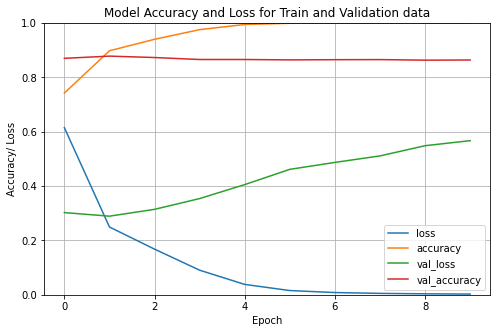

In [16]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model Accuracy and Loss for Train and Validation data')
plt.ylabel('Accuracy/ Loss')
plt.xlabel('Epoch')
plt.gca().set_ylim(0, 1) 
plt.show()

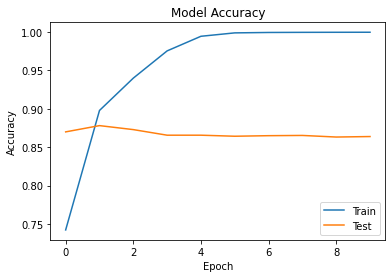

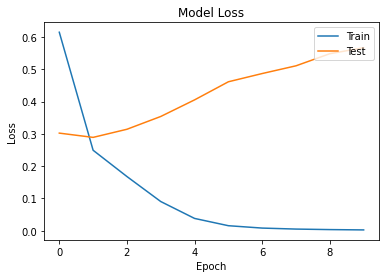

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# **Predict over one sample of data and check what will be the prediction for that.**

In [18]:
predicted = emb_model.predict(X_test[24].reshape(1, 2470))
print("Actual value=" + str(y_test[24]) + "    Predicted value=" + str(predicted.argmax()))

Actual value=0    Predicted value=0
